<center><h1>Bag of n grams</center>

<b>News Category Classification Problem

Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

- BUSINESS
- SPORTS
- CRIME
- SCIENCE

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('news_dataset.json')
df.head()


text  category
0  Watching Schrödinger's Cat Die University of C...   SCIENCE
1     WATCH: Freaky Vortex Opens Up In Flooded Lake    SCIENCE
2  Entrepreneurs Today Don't Need a Big Budget to...  BUSINESS
3  These Roads Could Recharge Your Electric Car A...  BUSINESS
4  Civilian 'Guard' Fires Gun While 'Protecting' ...     CRIME

In [3]:
print(df.shape)

(12695, 2)


In [4]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

<b>Handle class imbalance

undersampling

In [5]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [6]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

<b>Convert text category to a number

In [7]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [8]:
df_balanced.head()

text  category  \
11967  GCC Business Leaders Remain Confident in the F...  BUSINESS   
2912   From the Other Side; an Honest Review from Emp...  BUSINESS   
3408   Mike McDerment, CEO of FreshBooks, Talks About...  BUSINESS   
502    How to Market Your Business While Traveling th...  BUSINESS   
5279   How to Leverage Intuition in Decision-making I...  BUSINESS   

       category_num  
11967             0  
2912              0  
3408              0  
502               0  
5279              0

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [10]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [11]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [12]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

<b>Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [14]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [15]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [16]:
text1 = '''
Dhaka, March 8 – Bangladesh made history last night by securing their first-ever T20I series win against Australia with a thrilling 12-run victory in the third match at Sher-e-Bangla Stadium.

Batting first, Bangladesh posted 175/6, led by Litton Das’ 67 off 42 balls. The bowlers, spearheaded by Shakib Al Hasan and Mahedi Hasan, restricted Australia in the chase, sealing a 2-1 series triumph.

The Tigers now turn their focus to the upcoming ODI series, aiming to continue their dominance.
'''

In [17]:
clf.predict([text1])

array([1], dtype=int64)

1 means sports

In [18]:
text2 = '''
Dhaka, March 8 – A group of armed robbers stormed a jewelry store in Dhanmondi last night, escaping with valuables worth crores. Eyewitnesses reported that the criminals, wearing masks, held the staff at gunpoint before fleeing on motorcycles. Police have launched an investigation and are reviewing CCTV footage to identify the suspects.
'''

In [19]:
clf.predict([text2])

array([2], dtype=int64)

2 means crime

In [20]:
text3 = '''
Dhaka, March 8 – Bangladesh’s export earnings hit a record $5.2 billion in February, driven by strong demand in the garment sector. According to the Export Promotion Bureau (EPB), this marks a 15% year-on-year growth. Experts credit the increase to improved global market conditions and government incentives for exporters
'''

In [21]:
clf.predict([text3])

array([0], dtype=int64)

0 means bussiness

In [22]:
text4 = '''
Dhaka, March 8 – Bangladesh is set to launch its first Earth observation satellite by 2026, aiming to improve weather forecasting and disaster management. The Bangladesh Communication Satellite Company Limited (BCSCL) confirmed that the project is in its early stages, with international partnerships being explored. This will be the country’s second satellite after Bangabandhu-1, launched in 2018.
'''

In [23]:
clf.predict([text4])

array([3], dtype=int64)

3 means science

<b>Attempt 2 : Use 1-gram and bigrams

In [24]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [25]:
clf.predict([text1])

array([1], dtype=int64)

In [26]:
clf.predict([text2])

array([2], dtype=int64)

In [27]:
clf.predict([text3])

array([0], dtype=int64)

In [28]:
clf.predict([text4])

array([0], dtype=int64)

<b>Attempt 3 : Use 1-gram to trigrams

In [29]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [30]:
clf.predict([text1])

array([1], dtype=int64)

In [31]:
clf.predict([text2])

array([2], dtype=int64)

In [32]:
clf.predict([text3])

array([0], dtype=int64)

In [33]:
clf.predict([text4])

array([0], dtype=int64)

<b>Use text pre-processing to remove stop words, punctuations and apply lemmatization

We have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text

In [34]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 


In [35]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [36]:
df_balanced.head()

text  category  \
11967  GCC Business Leaders Remain Confident in the F...  BUSINESS   
2912   From the Other Side; an Honest Review from Emp...  BUSINESS   
3408   Mike McDerment, CEO of FreshBooks, Talks About...  BUSINESS   
502    How to Market Your Business While Traveling th...  BUSINESS   
5279   How to Leverage Intuition in Decision-making I...  BUSINESS   

       category_num                                   preprocessed_txt  
11967             0  GCC Business leader remain confident Face Regi...  
2912              0  Honest Review Employees wake morning love impo...  
3408              0  Mike McDerment CEO FreshBooks Talks give build...  
502               0  market business travel World recently amazing ...  
5279              0  leverage intuition decision making feel safe r...

<b>Build a model with pre processed text

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [38]:
print(X_train.shape)
X_train.head()

(4419,)


7589     ovulate Women prefer Images Penetration Images...
10442     scientist discover Spooky Influence Baby Choices
8792     Olympic Race Walker step Propose boyfriend Rio...
1733     Beloved Bipedal Bear name Pedals believe kill ...
2526       Elizabeth Smart give Birth Baby Girl Father say
Name: preprocessed_txt, dtype: object

In [39]:
y_train.value_counts()


category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [40]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [41]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       276
           1       0.94      0.82      0.87       277
           2       0.82      0.91      0.86       276
           3       0.91      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



If we compare above classification report for (1,2) gram with the one from unprocessed text, we will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

In [42]:
clf.predict([text1])

array([1], dtype=int64)

In [43]:
clf.predict([text2])

array([2], dtype=int64)

In [44]:
clf.predict([text3])

array([0], dtype=int64)

In [45]:
clf.predict([text4])

array([3], dtype=int64)

<b>Plot confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[242,   7,  16,  11],
       [ 12, 226,  33,   6],
       [ 17,   2, 252,   5],
       [ 37,   6,   7, 226]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

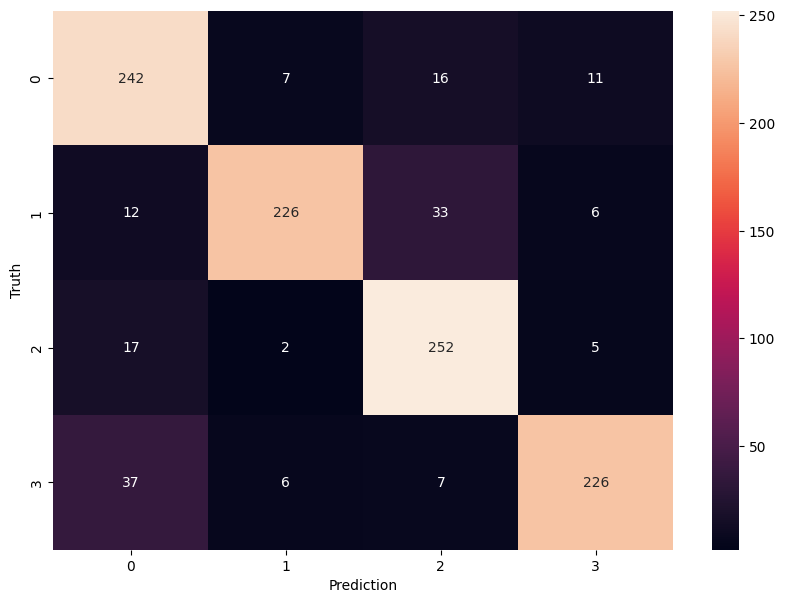

In [47]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')